In [1]:
import numpy as np

X = np.array([1, 1.4, 2.5])  # первое значение должно быть равно 1
w = np.array([0.4, 0.3, 0.5])


def net_input(X, w):
    return np.dot(X, w)


def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))


def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)


print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [4]:
# W : массив с формой= (n_output_units, n_hidden_units+l)
# первый столбец содержит элементы смещения
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
#А : массив данных с формой= (n_hidden_units + 1, n_samples)
# первый столбец должен содержать значения 1
A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Общий вход: \n', Z)
print('Выходные элементы: \n', y_probas)
y_class = np.argmax(Z, axis=0)
print('Спрогнозированная метка класса: %d' % y_class)

Общий вход: 
 [1.78 0.76 1.65]
Выходные элементы: 
 [0.85569687 0.68135373 0.83889105]
Спрогнозированная метка класса: 0


In [9]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))


y_probas = softmax(Z)
print('Вероятности: \n', y_probas)
np.sum(y_probas)

Вероятности: 
 [0.44668973 0.16107406 0.39223621]


1.0

In [10]:
import tensorflow as tf

Z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

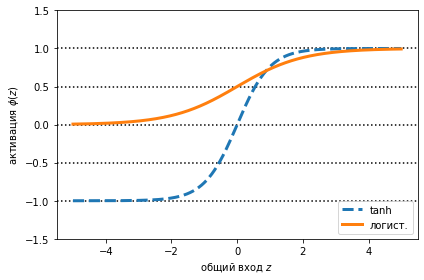

In [13]:
import matplotlib.pyplot as plt


def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)


z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('общий вход $z$')
plt.ylabel('активация $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act, linewidth=3, linestyle='--', label='tanh')
plt.plot(z, log_act, linewidth=3, label='логист.')
plt.legend(loc='lower right')
plt.tight_layout()

In [14]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [15]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])>

In [16]:
from scipy.special import expit

expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [18]:
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])>

In [19]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])>